# Comparison of streamflow modelling of choosen citites between a standard Long Short-Term Memory Network (LSTM) and a combined Convolutional Neuronal Network with Long Short-Term Memory Network (CNNLSTM)

### This notebooks reproduces the results related to the abstract "Vorhersage von Zeitreihen durch Nutzung von Machine Learning-Ansätzen am Beispiel einer Niederschlagabflussmodellierug"

### Polat, Kadir und Salhi, Hamza: "Vorhersage von Zeitreihen durch Nutzung von Machine Learning-Ansätzen am Beispiel einer Niederschlagabflussmodellierug"

## Setup
#### Librarys and seperated functions which are used in this Notebook. In getData the data for the considered basin is loaded. In preProcess all important preprocessing Steps like scaling, preparing an appropriate shape and at least shuffling the data are included. In model the concrete network architecture, the compilation and loss calculation is defined. In postProcess the Nash–Sutcliffe model efficiency coefficient is calculated as well as essential model parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts import getData
from scripts import preProcess  
from scripts import model 
from scripts import postProcess

# Download the dataset you need on following Websites
# Camels US Dataset: https://ral.ucar.edu/solutions/products/camels
# Daymet US Dataset: https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1840

## Cities

### In the following image the US clima map can be seen. Especially the cities Seattle/Eureka/Mesa which are considered for the streamflow prediction are marked in this map. 

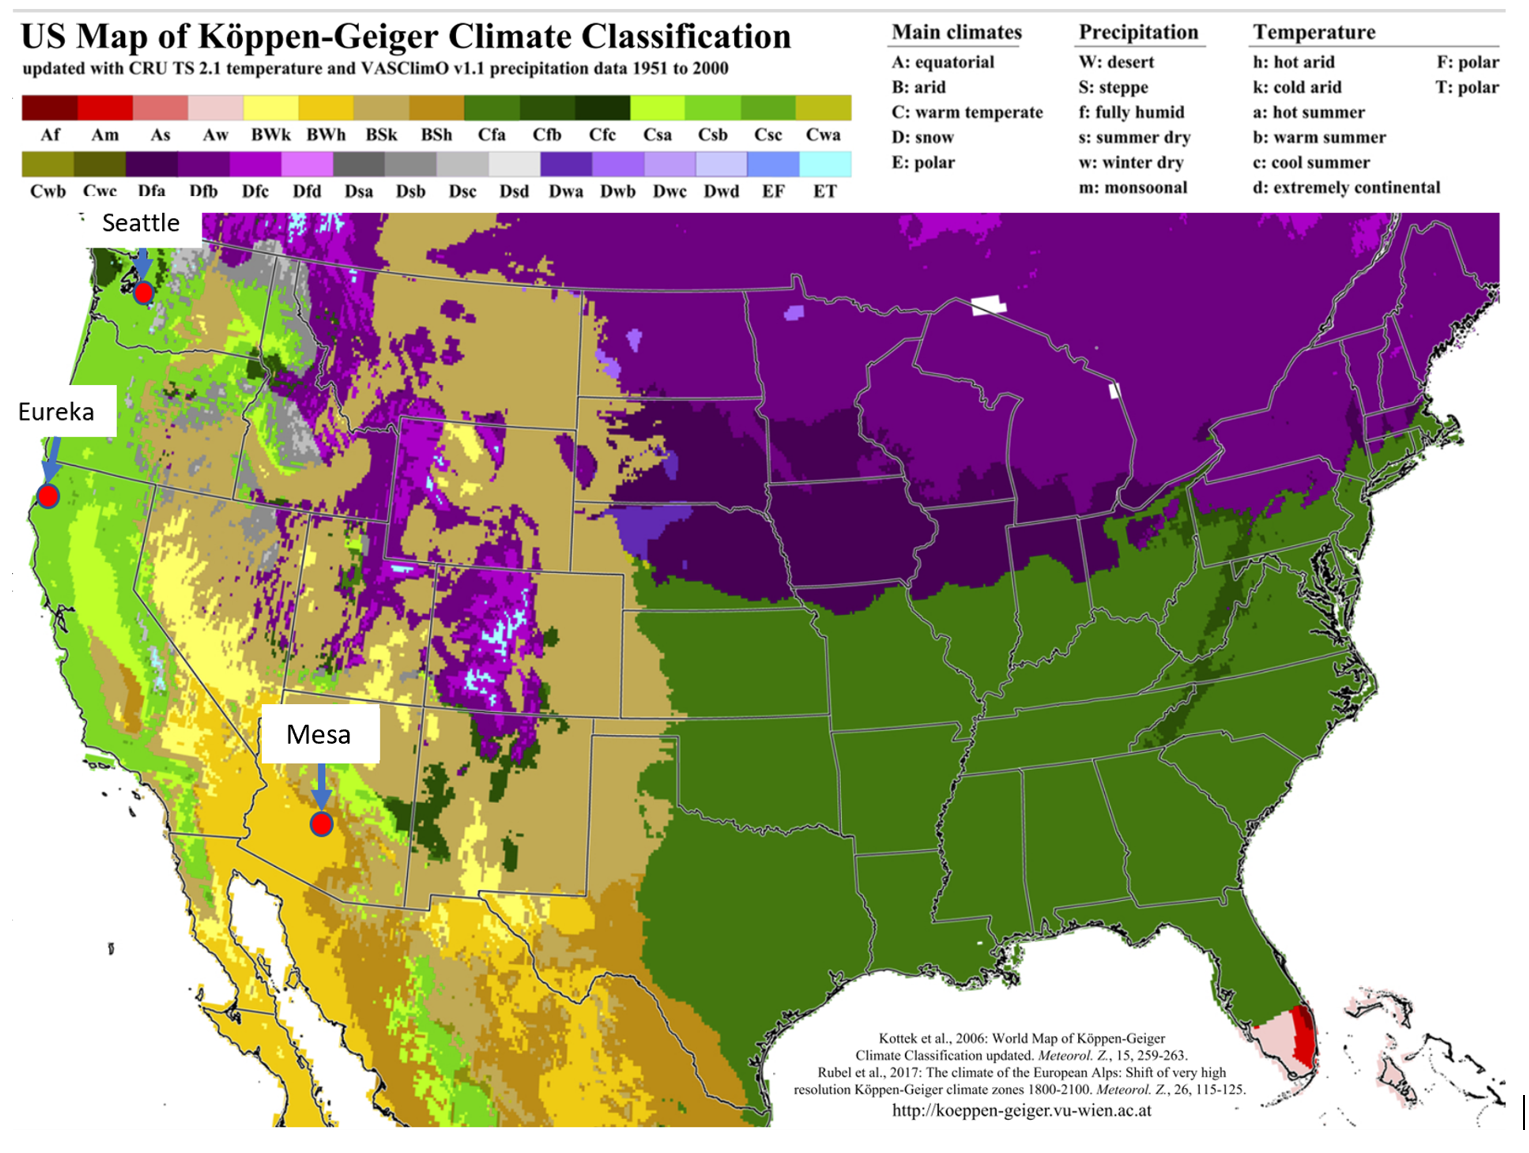

## Load Daymet Data for CNNLSTM
#### Loading the downloaded Daymet-US streamflow/forcing data and preprocess these. Daymet and Camels Dataset are differently build up. In this constellation the traindata includes 80% of the whole dataset. The evaluation and test dataset each include 10% of the whole dataset. In this case data from 1980 to 1996 is considered but can be changed by changing the start- and endyear variables. 50 days are used here to calculate the streamflow on day 50+1. Changing "days" for example to 30 would calculate the streamflow on day 30+1.

In [2]:
# Initialisierung der Daten
startyear=1980 # startyear
endyear=1996 # endyear
days=50 # days to consider


# Normalization
forcings_9494000,streamflow_9494000=getData.cnn_lstm_data(9494000,startyear, endyear)
forcings_9494000, SF_forcings_9494000 = preProcess.scale(forcings_9494000)
streamflow_9494000, SF_streamflow_9494000 = preProcess.scale(streamflow_9494000)
forcings_9494000,streamflow_9494000 = preProcess.prepareData(forcings_9494000,streamflow_9494000,days)
forcings_9494000,streamflow_9494000 = preProcess.shuffle(forcings_9494000,streamflow_9494000)

forcings_11522500,streamflow_11522500=getData.cnn_lstm_data(11522500,startyear, endyear)
forcings_11522500, SF_forcings_11522500 = preProcess.scale(forcings_11522500)
streamflow_11522500, SF_streamflow_11522500 = preProcess.scale(streamflow_11522500)
forcings_11522500,streamflow_11522500 = preProcess.prepareData(forcings_11522500,streamflow_11522500,days)
forcings_11522500,streamflow_11522500 = preProcess.shuffle(forcings_11522500,streamflow_11522500)

forcings_12189500,streamflow_12189500=getData.cnn_lstm_data(12189500,startyear, endyear)
forcings_12189500, SF_forcings_12189500 = preProcess.scale(forcings_12189500)
streamflow_12189500, SF_streamflow_12189500 = preProcess.scale(streamflow_12189500)
forcings_12189500,streamflow_12189500 = preProcess.prepareData(forcings_12189500,streamflow_12189500,days)
forcings_12189500,streamflow_12189500 = preProcess.shuffle(forcings_12189500,streamflow_12189500)

# Traindata
forcings_9494000_train = forcings_9494000[:round(forcings_9494000.shape[0]*0.8)]
streamflow_9494000_train = streamflow_9494000[:round(streamflow_9494000.shape[0]*0.8)]

forcings_11522500_train = forcings_11522500[:round(forcings_11522500.shape[0]*0.8)]
streamflow_11522500_train = streamflow_11522500[:round(streamflow_11522500.shape[0]*0.8)]

forcings_12189500_train = forcings_12189500[:round(forcings_12189500.shape[0]*0.8)]
streamflow_12189500_train = streamflow_12189500[:round(streamflow_12189500.shape[0]*0.8)]

# Evaluationdata
forcings_9494000_eval= forcings_9494000[round(forcings_9494000.shape[0]*0.8):round(forcings_9494000.shape[0]*0.9)]
streamflow_9494000_eval= streamflow_9494000[round(streamflow_9494000.shape[0]*0.8):round(streamflow_9494000.shape[0]*0.9)]

forcings_11522500_eval= forcings_11522500[round(forcings_11522500.shape[0]*0.8):round(forcings_11522500.shape[0]*0.9)]
streamflow_11522500_eval= streamflow_11522500[round(streamflow_11522500.shape[0]*0.8):round(streamflow_11522500.shape[0]*0.9)]

forcings_12189500_eval= forcings_12189500[round(forcings_12189500.shape[0]*0.8):round(forcings_12189500.shape[0]*0.9)]
streamflow_12189500_eval= streamflow_12189500[round(streamflow_12189500.shape[0]*0.8):round(streamflow_12189500.shape[0]*0.9)]

# Testdata
forcings_9494000_test= forcings_9494000[round(forcings_9494000.shape[0]*0.9):]
streamflow_9494000_test= streamflow_9494000[round(streamflow_9494000.shape[0]*0.9):]

forcings_11522500_test= forcings_11522500[round(forcings_11522500.shape[0]*0.9):]
streamflow_11522500_test= streamflow_11522500[round(streamflow_11522500.shape[0]*0.9):]

forcings_12189500_test= forcings_12189500[round(forcings_12189500.shape[0]*0.9):]
streamflow_12189500_test= streamflow_12189500[round(streamflow_12189500.shape[0]*0.9):]

# Train CNN-LSTM Models
#### Get model architecture, compile model and calculate loss.  Afterwards model is evaluated and based on testdata  output values are predicted. As input the shape of the considered and prepared basin is expected. The shape for the CNN-LSTM model contains Timesteps, x_shape, y_shape and features in this order. The shape for the LSTM model contains timesteps and features in this order. The batchsize which is in this case 64 and the number of epochs which is 100 can be changed for each mdoel separately.


### Mesa CNNLSTM

Epoch 1/100
63/63 [==============================] - 33s 517ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - mean_absolute_error: 0.2312 - val_loss: 0.0712 - val_mean_squared_error: 0.0710 - val_mean_absolute_error: 0.2147
Epoch 2/100
63/63 [==============================] - 25s 393ms/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2154 - val_loss: 0.0687 - val_mean_squared_error: 0.0686 - val_mean_absolute_error: 0.2102
Epoch 3/100
63/63 [==============================] - 22s 347ms/step - loss: 0.0666 - mean_squared_error: 0.0666 - mean_absolute_error: 0.2013 - val_loss: 0.0631 - val_mean_squared_error: 0.0630 - val_mean_absolute_error: 0.1889
Epoch 4/100
63/63 [==============================] - 21s 328ms/step - loss: 0.0620 - mean_squared_error: 0.0620 - mean_absolute_error: 0.1916 - val_loss: 0.0541 - val_mean_squared_error: 0.0540 - val_mean_absolute_error: 0.1761
Epoch 5/100
63/63 [==============================] - 20s 323ms/step - loss: 0.0593 - mea

63/63 [==============================] - 21s 328ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - mean_absolute_error: 0.0893 - val_loss: 0.0168 - val_mean_squared_error: 0.0167 - val_mean_absolute_error: 0.0899
Epoch 36/100
63/63 [==============================] - 21s 331ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - mean_absolute_error: 0.0899 - val_loss: 0.0165 - val_mean_squared_error: 0.0164 - val_mean_absolute_error: 0.0890
Epoch 37/100
63/63 [==============================] - 21s 330ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - mean_absolute_error: 0.0870 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0912
Epoch 38/100
63/63 [==============================] - 21s 329ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0875 - val_loss: 0.0177 - val_mean_squared_error: 0.0176 - val_mean_absolute_error: 0.0917
Epoch 39/100
63/63 [==============================] - 21s 337ms/step - loss: 0.0150 - mean_square

Epoch 71/100
63/63 [==============================] - 21s 327ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - mean_absolute_error: 0.0733 - val_loss: 0.0132 - val_mean_squared_error: 0.0131 - val_mean_absolute_error: 0.0761
Epoch 72/100
63/63 [==============================] - 21s 328ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0719 - val_loss: 0.0131 - val_mean_squared_error: 0.0130 - val_mean_absolute_error: 0.0758
Epoch 73/100
63/63 [==============================] - 21s 332ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0716 - val_loss: 0.0144 - val_mean_squared_error: 0.0143 - val_mean_absolute_error: 0.0821
Epoch 74/100
63/63 [==============================] - 21s 334ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - mean_absolute_error: 0.0711 - val_loss: 0.0136 - val_mean_squared_error: 0.0135 - val_mean_absolute_error: 0.0752
Epoch 75/100
63/63 [==============================] - 21s 330ms/step - loss: 0.0095 

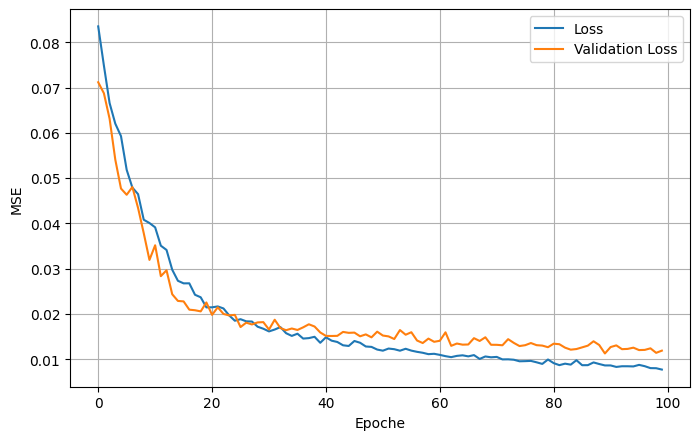

In [3]:
dnn_model_9494000 = model.model_CNN_LSTM(forcings_9494000.shape[1],forcings_9494000.shape[2],forcings_9494000.shape[3],
                                       forcings_9494000.shape[4])

history = model.kompilierung(model=dnn_model_9494000, inputs=forcings_9494000_train, targets=streamflow_9494000_train,
                          validation=(forcings_9494000_eval, streamflow_9494000_eval), batch_size=64, epochs=100)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_9494000 = dnn_model_9494000.evaluate(forcings_9494000_test, streamflow_9494000_test)
# Vorhersage der auf den Testdaten
y_predicted_9494000 = dnn_model_9494000.predict(forcings_9494000_test)


### Eureka CNNLSTM

Epoch 1/100
63/63 [==============================] - 38s 606ms/step - loss: 0.0652 - mean_squared_error: 0.0652 - mean_absolute_error: 0.1959 - val_loss: 0.0610 - val_mean_squared_error: 0.0612 - val_mean_absolute_error: 0.1784
Epoch 2/100
63/63 [==============================] - 33s 531ms/step - loss: 0.0491 - mean_squared_error: 0.0491 - mean_absolute_error: 0.1671 - val_loss: 0.0486 - val_mean_squared_error: 0.0487 - val_mean_absolute_error: 0.1600
Epoch 3/100
63/63 [==============================] - 32s 516ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - mean_absolute_error: 0.1491 - val_loss: 0.0440 - val_mean_squared_error: 0.0440 - val_mean_absolute_error: 0.1676
Epoch 4/100
63/63 [==============================] - 35s 550ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - mean_absolute_error: 0.1384 - val_loss: 0.0360 - val_mean_squared_error: 0.0360 - val_mean_absolute_error: 0.1346
Epoch 5/100
63/63 [==============================] - 32s 505ms/step - loss: 0.0313 - mea

Epoch 37/100
63/63 [==============================] - 32s 511ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - mean_absolute_error: 0.0802 - val_loss: 0.0142 - val_mean_squared_error: 0.0142 - val_mean_absolute_error: 0.0826
Epoch 38/100
63/63 [==============================] - 25s 393ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0766 - val_loss: 0.0146 - val_mean_squared_error: 0.0146 - val_mean_absolute_error: 0.0831
Epoch 39/100
63/63 [==============================] - 24s 385ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - mean_absolute_error: 0.0739 - val_loss: 0.0138 - val_mean_squared_error: 0.0138 - val_mean_absolute_error: 0.0774
Epoch 40/100
63/63 [==============================] - 24s 386ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - mean_absolute_error: 0.0752 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.0785
Epoch 41/100
63/63 [==============================] - 24s 385ms/step - loss: 0.0109 

Epoch 73/100
63/63 [==============================] - 27s 428ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0625 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_mean_absolute_error: 0.0675
Epoch 74/100
63/63 [==============================] - 29s 456ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0621 - val_loss: 0.0114 - val_mean_squared_error: 0.0114 - val_mean_absolute_error: 0.0708
Epoch 75/100
63/63 [==============================] - 27s 424ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0640 - val_loss: 0.0124 - val_mean_squared_error: 0.0123 - val_mean_absolute_error: 0.0741
Epoch 76/100
63/63 [==============================] - 28s 441ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0618 - val_loss: 0.0110 - val_mean_squared_error: 0.0109 - val_mean_absolute_error: 0.0677
Epoch 77/100
63/63 [==============================] - 25s 392ms/step - loss: 0.0076 

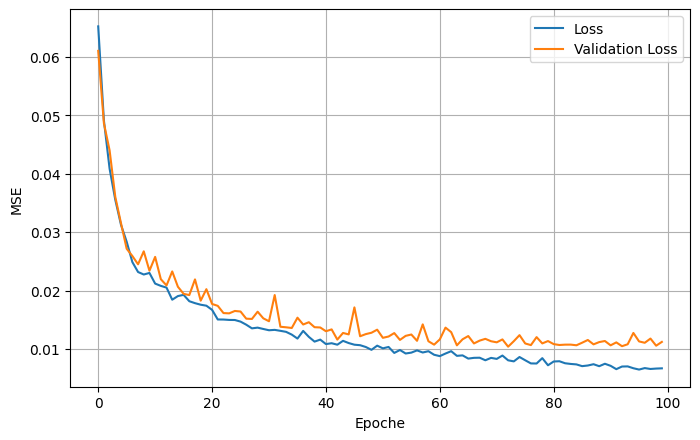

In [4]:
dnn_model_11522500 = model.model_CNN_LSTM(forcings_11522500.shape[1],forcings_11522500.shape[2],forcings_11522500.shape[3],
                                        forcings_11522500.shape[4])

history = model.kompilierung(model=dnn_model_11522500, inputs=forcings_11522500_train, targets=streamflow_11522500_train,
                          validation=(forcings_11522500_eval, streamflow_11522500_eval), batch_size=64, epochs=100)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_11522500 = dnn_model_11522500.evaluate(forcings_11522500_test, streamflow_11522500_test)
# Vorhersage der auf den Testdaten
y_predicted_11522500 = dnn_model_11522500.predict(forcings_11522500_test)

### Seattle CNNLSTM

Epoch 1/100
63/63 [==============================] - 31s 493ms/step - loss: 0.0784 - mean_squared_error: 0.0784 - mean_absolute_error: 0.2218 - val_loss: 0.0636 - val_mean_squared_error: 0.0635 - val_mean_absolute_error: 0.1996
Epoch 2/100
63/63 [==============================] - 24s 384ms/step - loss: 0.0646 - mean_squared_error: 0.0646 - mean_absolute_error: 0.2001 - val_loss: 0.0635 - val_mean_squared_error: 0.0635 - val_mean_absolute_error: 0.2157
Epoch 3/100
63/63 [==============================] - 23s 368ms/step - loss: 0.0571 - mean_squared_error: 0.0571 - mean_absolute_error: 0.1848 - val_loss: 0.0589 - val_mean_squared_error: 0.0588 - val_mean_absolute_error: 0.1675
Epoch 4/100
63/63 [==============================] - 23s 369ms/step - loss: 0.0525 - mean_squared_error: 0.0525 - mean_absolute_error: 0.1754 - val_loss: 0.0575 - val_mean_squared_error: 0.0573 - val_mean_absolute_error: 0.1625
Epoch 5/100
63/63 [==============================] - 23s 368ms/step - loss: 0.0502 - mea

Epoch 37/100
63/63 [==============================] - 26s 406ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - mean_absolute_error: 0.0907 - val_loss: 0.0171 - val_mean_squared_error: 0.0172 - val_mean_absolute_error: 0.0957
Epoch 38/100
63/63 [==============================] - 30s 473ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0875 - val_loss: 0.0190 - val_mean_squared_error: 0.0190 - val_mean_absolute_error: 0.0979
Epoch 39/100
63/63 [==============================] - 25s 399ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - mean_absolute_error: 0.0896 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_mean_absolute_error: 0.0944
Epoch 40/100
63/63 [==============================] - 27s 431ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - mean_absolute_error: 0.0890 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - val_mean_absolute_error: 0.0985
Epoch 41/100
63/63 [==============================] - 24s 373ms/step - loss: 0.0143 

Epoch 73/100
63/63 [==============================] - 23s 370ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - mean_absolute_error: 0.0754 - val_loss: 0.0160 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.0896
Epoch 74/100
63/63 [==============================] - 23s 369ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - mean_absolute_error: 0.0742 - val_loss: 0.0158 - val_mean_squared_error: 0.0159 - val_mean_absolute_error: 0.0892
Epoch 75/100
63/63 [==============================] - 23s 371ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - mean_absolute_error: 0.0728 - val_loss: 0.0150 - val_mean_squared_error: 0.0150 - val_mean_absolute_error: 0.0870
Epoch 76/100
63/63 [==============================] - 23s 370ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0714 - val_loss: 0.0158 - val_mean_squared_error: 0.0159 - val_mean_absolute_error: 0.0902
Epoch 77/100
63/63 [==============================] - 25s 398ms/step - loss: 0.0102 

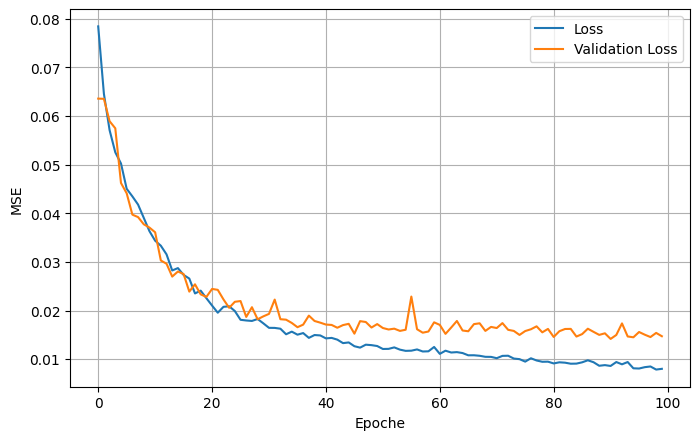

In [5]:
dnn_model_12189500 = model.model_CNN_LSTM(forcings_12189500.shape[1],forcings_12189500.shape[2],forcings_12189500.shape[3],
                                        forcings_12189500.shape[4])

history = model.kompilierung(model=dnn_model_12189500, inputs=forcings_12189500_train, targets=streamflow_12189500_train,
                          validation=(forcings_12189500_eval, streamflow_12189500_eval), batch_size=64, epochs=100)

model.loss(history)


# Evaluierung und Speichern der Metriken
dnn_results_12189500 = dnn_model_12189500.evaluate(forcings_12189500_test, streamflow_12189500_test)
# Vorhersage der auf den Testdaten
y_predicted_12189500 = dnn_model_12189500.predict(forcings_12189500_test)


## Load Camels US Dataset for LSTM
#### Loading the downloaded Camels-US  streamflow/forcing data and preprocess these. Daymet and Camels Dataset are differently build up. In this constellation the traindata includes 80% of the whole dataset. The evaluation and test dataset each include 10% of the whole dataset. In this case data from 1980 to 1996 is considered but can be changed by changing the start- and endyear variables. 50 days are used here to calculate the streamflow on day 50+1. Changing "days" for example to 30 would calculate the streamflow on day 30+1.

In [6]:
basin = ["09494000","11522500","12189500"] # Areas to consider

start_date="80-01-01" # startdate: YY-MM-DD
end_date="95-12-31" # enddate: YY-MM-DD
days=50 # Days to consider

forcing,streamflow = getData.lstm_data(basin,start_date, end_date,days) # load data 

# Normalization
forcing_LSTM_9494000, SF_LSTM_forcing_9494000 = preProcess.scale(forcing[0])
streamflow_LSTM_9494000, SF_LSTM_streamflow_9494000 = preProcess.scale(streamflow[0])
forcing_LSTM_9494000,streamflow_LSTM_9494000 = preProcess.prepareTensor(forcing_LSTM_9494000,streamflow_LSTM_9494000,days)
forcing_LSTM_9494000,streamflow_LSTM_9494000 = preProcess.shuffle(forcing_LSTM_9494000,streamflow_LSTM_9494000)

forcing_LSTM_11522500, SF_LSTM_forcing_11522500 = preProcess.scale(forcing[1])
streamflow_LSTM_11522500, SF_LSTM_streamflow_11522500 = preProcess.scale(streamflow[1])
forcing_LSTM_11522500,streamflow_LSTM_11522500 = preProcess.prepareTensor(forcing_LSTM_11522500,streamflow_LSTM_11522500,days)
forcing_LSTM_11522500,streamflow_LSTM_11522500 = preProcess.shuffle(forcing_LSTM_11522500,streamflow_LSTM_11522500)

forcing_LSTM_12189500, SF_LSTM_forcing_12189500 = preProcess.scale(forcing[2])
streamflow_LSTM_12189500, SF_LSTM_streamflow_12189500 = preProcess.scale(streamflow[2])
forcing_LSTM_12189500,streamflow_LSTM_12189500 = preProcess.prepareTensor(forcing_LSTM_12189500,streamflow_LSTM_12189500,days)
forcing_LSTM_12189500,streamflow_LSTM_12189500 = preProcess.shuffle(forcing_LSTM_12189500,streamflow_LSTM_12189500)

# Traindata
forcing_LSTM_9494000_train = forcing_LSTM_9494000[:round(len(forcing_LSTM_9494000)*0.8)]
streamflow_LSTM_9494000_train = streamflow_LSTM_9494000[:round(len(streamflow_LSTM_9494000)*0.8)]

forcing_LSTM_11522500_train = forcing_LSTM_11522500[:round(len(forcing_LSTM_11522500)*0.8)]
streamflow_LSTM_11522500_train = streamflow_LSTM_11522500[:round(len(streamflow_LSTM_11522500)*0.8)]

forcing_LSTM_12189500_train = forcing_LSTM_12189500[:round(len(forcing_LSTM_12189500)*0.8)]
streamflow_LSTM_12189500_train = streamflow_LSTM_12189500[:round(len(streamflow_LSTM_12189500)*0.8)]

# Evaldata
forcing_LSTM_9494000_eval= forcing_LSTM_9494000[round(len(forcing_LSTM_9494000)*0.8):round(len(forcing_LSTM_9494000)*0.9)]
streamflow_LSTM_9494000_eval= streamflow_LSTM_9494000[round(len(streamflow_LSTM_9494000)*0.8):round(len(streamflow_LSTM_9494000)*0.9)]

forcing_LSTM_11522500_eval= forcing_LSTM_11522500[round(len(forcing_LSTM_11522500)*0.8):round(len(forcing_LSTM_11522500)*0.9)]
streamflow_LSTM_11522500_eval= streamflow_LSTM_11522500[round(len(streamflow_LSTM_11522500)*0.8):round(len(streamflow_LSTM_11522500)*0.9)]

forcing_LSTM_12189500_eval= forcing_LSTM_12189500[round(len(forcing_LSTM_12189500)*0.8):round(len(forcing_LSTM_12189500)*0.9)]
streamflow_LSTM_12189500_eval= streamflow_LSTM_12189500[round(len(streamflow_LSTM_12189500)*0.8):round(len(streamflow_LSTM_12189500)*0.9)]

# Testdata
forcing_LSTM_9494000_test= forcing_LSTM_9494000[round(len(forcing_LSTM_9494000)*0.9):]
streamflow_LSTM_9494000_test= streamflow_LSTM_9494000[round(len(streamflow_LSTM_9494000)*0.9):]

forcing_LSTM_11522500_test= forcing_LSTM_11522500[round(len(forcing_LSTM_11522500)*0.9):]
streamflow_LSTM_11522500_test= streamflow_LSTM_11522500[round(len(streamflow_LSTM_11522500)*0.9):]

forcing_LSTM_12189500_test= forcing_LSTM_12189500[round(len(forcing_LSTM_12189500)*0.9):]
streamflow_LSTM_12189500_test= streamflow_LSTM_12189500[round(len(streamflow_LSTM_12189500)*0.9):]


### Mesa LSTM

Epoch 1/200
73/73 [==============================] - 2s 28ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0404 - val_loss: 0.0024 - val_mean_squared_error: 0.0022 - val_mean_absolute_error: 0.0261
Epoch 2/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0239 - val_loss: 0.0020 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0204
Epoch 3/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0209 - val_loss: 0.0017 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0183
Epoch 4/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0189 - val_loss: 0.0016 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0178
Epoch 5/200
73/73 [==============================] - 1s 9ms/step - loss: 0.0013 - mean_squared_e

Epoch 37/200
73/73 [==============================] - 1s 9ms/step - loss: 9.4461e-04 - mean_squared_error: 9.4085e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0139
Epoch 38/200
73/73 [==============================] - 1s 9ms/step - loss: 9.0662e-04 - mean_squared_error: 9.0169e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0156
Epoch 39/200
73/73 [==============================] - 1s 9ms/step - loss: 9.1316e-04 - mean_squared_error: 9.0963e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0013 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0167
Epoch 40/200
73/73 [==============================] - 1s 9ms/step - loss: 8.8743e-04 - mean_squared_error: 8.8146e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0013 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0142
Epoch 41/200
73/73 [==============================] - 1s 10ms/st

73/73 [==============================] - 1s 10ms/step - loss: 5.9588e-04 - mean_squared_error: 5.9361e-04 - mean_absolute_error: 0.0134 - val_loss: 6.0810e-04 - val_mean_squared_error: 5.5735e-04 - val_mean_absolute_error: 0.0124
Epoch 72/200
73/73 [==============================] - 1s 9ms/step - loss: 5.8976e-04 - mean_squared_error: 5.8761e-04 - mean_absolute_error: 0.0125 - val_loss: 6.7130e-04 - val_mean_squared_error: 6.1381e-04 - val_mean_absolute_error: 0.0134
Epoch 73/200
73/73 [==============================] - 1s 9ms/step - loss: 6.5923e-04 - mean_squared_error: 6.8369e-04 - mean_absolute_error: 0.0136 - val_loss: 7.8020e-04 - val_mean_squared_error: 7.2923e-04 - val_mean_absolute_error: 0.0133
Epoch 74/200
73/73 [==============================] - 1s 9ms/step - loss: 6.5401e-04 - mean_squared_error: 6.5064e-04 - mean_absolute_error: 0.0136 - val_loss: 7.3854e-04 - val_mean_squared_error: 6.7268e-04 - val_mean_absolute_error: 0.0124
Epoch 75/200
73/73 [========================

Epoch 105/200
73/73 [==============================] - 1s 9ms/step - loss: 3.0544e-04 - mean_squared_error: 3.0360e-04 - mean_absolute_error: 0.0094 - val_loss: 6.0215e-04 - val_mean_squared_error: 5.4767e-04 - val_mean_absolute_error: 0.0101
Epoch 106/200
73/73 [==============================] - 1s 9ms/step - loss: 3.5257e-04 - mean_squared_error: 3.5086e-04 - mean_absolute_error: 0.0098 - val_loss: 6.9357e-04 - val_mean_squared_error: 6.2953e-04 - val_mean_absolute_error: 0.0108
Epoch 107/200
73/73 [==============================] - 1s 9ms/step - loss: 3.0440e-04 - mean_squared_error: 3.0316e-04 - mean_absolute_error: 0.0098 - val_loss: 5.8987e-04 - val_mean_squared_error: 5.3925e-04 - val_mean_absolute_error: 0.0105
Epoch 108/200
73/73 [==============================] - 1s 9ms/step - loss: 2.8935e-04 - mean_squared_error: 2.8796e-04 - mean_absolute_error: 0.0097 - val_loss: 5.5056e-04 - val_mean_squared_error: 5.0643e-04 - val_mean_absolute_error: 0.0133
Epoch 109/200
73/73 [=======

Epoch 139/200
73/73 [==============================] - 1s 9ms/step - loss: 3.0133e-04 - mean_squared_error: 3.0001e-04 - mean_absolute_error: 0.0104 - val_loss: 7.4536e-04 - val_mean_squared_error: 6.8050e-04 - val_mean_absolute_error: 0.0109
Epoch 140/200
73/73 [==============================] - 1s 10ms/step - loss: 2.5053e-04 - mean_squared_error: 2.4972e-04 - mean_absolute_error: 0.0094 - val_loss: 6.2548e-04 - val_mean_squared_error: 5.6771e-04 - val_mean_absolute_error: 0.0116
Epoch 141/200
73/73 [==============================] - 1s 9ms/step - loss: 2.2006e-04 - mean_squared_error: 2.1987e-04 - mean_absolute_error: 0.0091 - val_loss: 6.1692e-04 - val_mean_squared_error: 5.5909e-04 - val_mean_absolute_error: 0.0093
Epoch 142/200
73/73 [==============================] - 1s 9ms/step - loss: 2.0179e-04 - mean_squared_error: 2.0128e-04 - mean_absolute_error: 0.0086 - val_loss: 5.3851e-04 - val_mean_squared_error: 4.9377e-04 - val_mean_absolute_error: 0.0088
Epoch 143/200
73/73 [======

Epoch 173/200
73/73 [==============================] - 1s 9ms/step - loss: 9.8581e-05 - mean_squared_error: 9.8180e-05 - mean_absolute_error: 0.0060 - val_loss: 4.9720e-04 - val_mean_squared_error: 4.5296e-04 - val_mean_absolute_error: 0.0078
Epoch 174/200
73/73 [==============================] - 1s 9ms/step - loss: 1.0198e-04 - mean_squared_error: 1.0167e-04 - mean_absolute_error: 0.0061 - val_loss: 4.2324e-04 - val_mean_squared_error: 3.8463e-04 - val_mean_absolute_error: 0.0078
Epoch 175/200
73/73 [==============================] - 1s 9ms/step - loss: 1.2766e-04 - mean_squared_error: 1.2788e-04 - mean_absolute_error: 0.0066 - val_loss: 5.8513e-04 - val_mean_squared_error: 5.3419e-04 - val_mean_absolute_error: 0.0076
Epoch 176/200
73/73 [==============================] - 1s 9ms/step - loss: 1.2786e-04 - mean_squared_error: 1.2732e-04 - mean_absolute_error: 0.0067 - val_loss: 6.0907e-04 - val_mean_squared_error: 5.5433e-04 - val_mean_absolute_error: 0.0082
Epoch 177/200
73/73 [=======

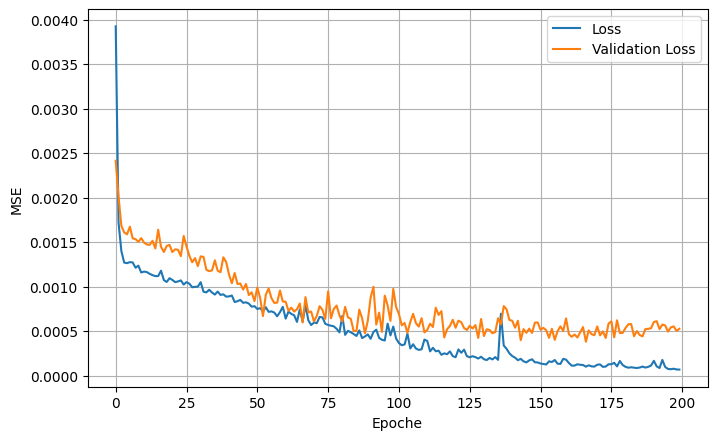

In [7]:
dnn_model_LSTM_9494000 = model.model_LSTM(forcing_LSTM_9494000.shape[1],forcing_LSTM_9494000.shape[2])

# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_9494000, inputs=forcing_LSTM_9494000_train, targets=streamflow_LSTM_9494000_train,
                          validation=(forcing_LSTM_9494000_eval, streamflow_LSTM_9494000_eval), batch_size=64, epochs=200)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_9494000_LSTM = dnn_model_LSTM_9494000.evaluate(forcing_LSTM_9494000_test, streamflow_LSTM_9494000_test)
# Vorhersage der auf den Testdaten
y_predicted_9494000_LSTM = dnn_model_LSTM_9494000.predict(forcing_LSTM_9494000_test)

### Eureka LSTM

Epoch 1/200
73/73 [==============================] - 2s 30ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0376 - val_loss: 0.0030 - val_mean_squared_error: 0.0028 - val_mean_absolute_error: 0.0309
Epoch 2/200
73/73 [==============================] - 1s 13ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0316 - val_loss: 0.0033 - val_mean_squared_error: 0.0030 - val_mean_absolute_error: 0.0284
Epoch 3/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0288 - val_loss: 0.0024 - val_mean_squared_error: 0.0022 - val_mean_absolute_error: 0.0236
Epoch 4/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0263 - val_loss: 0.0023 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0236
Epoch 5/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0026 - mean_squared_

73/73 [==============================] - 1s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0193 - val_loss: 0.0014 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0212
Epoch 38/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0190 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0201
Epoch 39/200
73/73 [==============================] - 1s 12ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0178 - val_loss: 0.0015 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0217
Epoch 40/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0194 - val_loss: 0.0010 - val_mean_squared_error: 9.3981e-04 - val_mean_absolute_error: 0.0170
Epoch 41/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0012 - mean_squared_error

Epoch 72/200
73/73 [==============================] - 1s 9ms/step - loss: 7.8936e-04 - mean_squared_error: 7.8675e-04 - mean_absolute_error: 0.0155 - val_loss: 8.4372e-04 - val_mean_squared_error: 7.6853e-04 - val_mean_absolute_error: 0.0148
Epoch 73/200
73/73 [==============================] - 1s 9ms/step - loss: 6.9244e-04 - mean_squared_error: 7.0343e-04 - mean_absolute_error: 0.0139 - val_loss: 7.6492e-04 - val_mean_squared_error: 6.9523e-04 - val_mean_absolute_error: 0.0153
Epoch 74/200
73/73 [==============================] - 1s 8ms/step - loss: 7.2746e-04 - mean_squared_error: 7.2487e-04 - mean_absolute_error: 0.0148 - val_loss: 8.1299e-04 - val_mean_squared_error: 7.3886e-04 - val_mean_absolute_error: 0.0158
Epoch 75/200
73/73 [==============================] - 1s 9ms/step - loss: 7.0748e-04 - mean_squared_error: 7.0442e-04 - mean_absolute_error: 0.0145 - val_loss: 6.9214e-04 - val_mean_squared_error: 6.2991e-04 - val_mean_absolute_error: 0.0127
Epoch 76/200
73/73 [============

Epoch 106/200
73/73 [==============================] - 1s 9ms/step - loss: 7.0168e-04 - mean_squared_error: 6.9998e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0010 - val_mean_squared_error: 9.7115e-04 - val_mean_absolute_error: 0.0205
Epoch 107/200
73/73 [==============================] - 1s 8ms/step - loss: 5.5190e-04 - mean_squared_error: 5.4898e-04 - mean_absolute_error: 0.0129 - val_loss: 5.6095e-04 - val_mean_squared_error: 5.2028e-04 - val_mean_absolute_error: 0.0127
Epoch 108/200
73/73 [==============================] - 1s 9ms/step - loss: 4.5133e-04 - mean_squared_error: 4.5971e-04 - mean_absolute_error: 0.0116 - val_loss: 6.1439e-04 - val_mean_squared_error: 5.6418e-04 - val_mean_absolute_error: 0.0129
Epoch 109/200
73/73 [==============================] - 1s 9ms/step - loss: 4.5511e-04 - mean_squared_error: 4.5828e-04 - mean_absolute_error: 0.0115 - val_loss: 6.4709e-04 - val_mean_squared_error: 5.9858e-04 - val_mean_absolute_error: 0.0117
Epoch 110/200
73/73 [===========

Epoch 140/200
73/73 [==============================] - 1s 9ms/step - loss: 3.4610e-04 - mean_squared_error: 3.4619e-04 - mean_absolute_error: 0.0108 - val_loss: 5.5866e-04 - val_mean_squared_error: 5.2020e-04 - val_mean_absolute_error: 0.0113
Epoch 141/200
73/73 [==============================] - 1s 9ms/step - loss: 3.1570e-04 - mean_squared_error: 3.1498e-04 - mean_absolute_error: 0.0095 - val_loss: 7.2644e-04 - val_mean_squared_error: 6.6670e-04 - val_mean_absolute_error: 0.0132
Epoch 142/200
73/73 [==============================] - 1s 12ms/step - loss: 3.0859e-04 - mean_squared_error: 3.0696e-04 - mean_absolute_error: 0.0097 - val_loss: 6.1483e-04 - val_mean_squared_error: 5.6219e-04 - val_mean_absolute_error: 0.0114
Epoch 143/200
73/73 [==============================] - 1s 11ms/step - loss: 2.8415e-04 - mean_squared_error: 2.8321e-04 - mean_absolute_error: 0.0094 - val_loss: 6.3397e-04 - val_mean_squared_error: 5.7900e-04 - val_mean_absolute_error: 0.0115
Epoch 144/200
73/73 [=====

Epoch 174/200
73/73 [==============================] - 1s 9ms/step - loss: 2.4842e-04 - mean_squared_error: 2.5022e-04 - mean_absolute_error: 0.0087 - val_loss: 7.8822e-04 - val_mean_squared_error: 7.1721e-04 - val_mean_absolute_error: 0.0124
Epoch 175/200
73/73 [==============================] - 1s 9ms/step - loss: 2.1403e-04 - mean_squared_error: 2.1281e-04 - mean_absolute_error: 0.0084 - val_loss: 8.2802e-04 - val_mean_squared_error: 7.5292e-04 - val_mean_absolute_error: 0.0120
Epoch 176/200
73/73 [==============================] - 1s 9ms/step - loss: 1.9314e-04 - mean_squared_error: 1.9199e-04 - mean_absolute_error: 0.0076 - val_loss: 6.3040e-04 - val_mean_squared_error: 5.7199e-04 - val_mean_absolute_error: 0.0111
Epoch 177/200
73/73 [==============================] - 1s 9ms/step - loss: 2.0907e-04 - mean_squared_error: 2.1130e-04 - mean_absolute_error: 0.0081 - val_loss: 7.3981e-04 - val_mean_squared_error: 6.7096e-04 - val_mean_absolute_error: 0.0113
Epoch 178/200
73/73 [=======

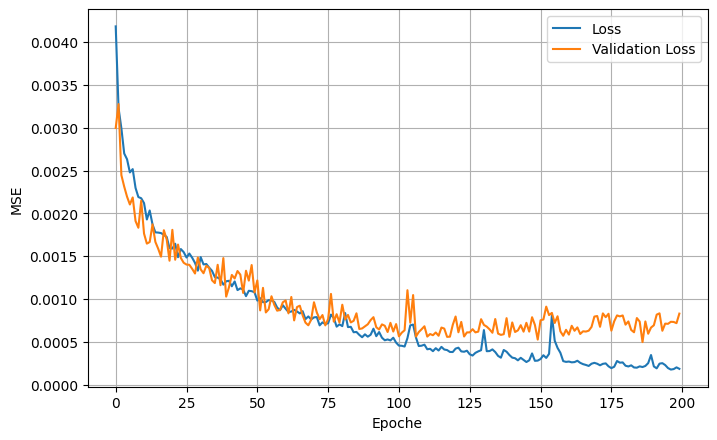

In [8]:
dnn_model_LSTM_11522500 = model.model_LSTM(forcing_LSTM_11522500.shape[1],forcing_LSTM_11522500.shape[2])
# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_11522500, inputs=forcing_LSTM_11522500_train, targets=streamflow_LSTM_11522500_train,
                          validation=(forcing_LSTM_11522500_eval, streamflow_LSTM_11522500_eval), batch_size=64, epochs=200)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_11522500_LSTM = dnn_model_LSTM_11522500.evaluate(forcing_LSTM_11522500_test, streamflow_LSTM_11522500_test)
# Vorhersage der auf den Testdaten
y_predicted_11522500_LSTM = dnn_model_LSTM_11522500.predict(forcing_LSTM_11522500_test)


### Seattle LSTM

Epoch 1/200
73/73 [==============================] - 2s 21ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0388 - val_loss: 0.0029 - val_mean_squared_error: 0.0026 - val_mean_absolute_error: 0.0297
Epoch 2/200
73/73 [==============================] - 1s 11ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0289 - val_loss: 0.0029 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0246
Epoch 3/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0271 - val_loss: 0.0027 - val_mean_squared_error: 0.0025 - val_mean_absolute_error: 0.0244
Epoch 4/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0259 - val_loss: 0.0027 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0259
Epoch 5/200
73/73 [==============================] - 1s 10ms/step - loss: 0.0022 - mean_squared_

Epoch 37/200
73/73 [==============================] - 1s 10ms/step - loss: 8.9642e-04 - mean_squared_error: 8.9652e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0172
Epoch 38/200
73/73 [==============================] - 1s 11ms/step - loss: 8.8684e-04 - mean_squared_error: 8.8336e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0167
Epoch 39/200
73/73 [==============================] - 1s 10ms/step - loss: 8.5892e-04 - mean_squared_error: 8.5408e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0153
Epoch 40/200
73/73 [==============================] - 1s 10ms/step - loss: 8.2507e-04 - mean_squared_error: 8.2123e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0157
Epoch 41/200
73/73 [==============================] - 1s 10m

Epoch 72/200
73/73 [==============================] - 1s 11ms/step - loss: 6.7463e-04 - mean_squared_error: 6.7222e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0165
Epoch 73/200
73/73 [==============================] - 1s 10ms/step - loss: 6.6567e-04 - mean_squared_error: 6.6507e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0151
Epoch 74/200
73/73 [==============================] - 1s 10ms/step - loss: 7.3517e-04 - mean_squared_error: 7.3720e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0160
Epoch 75/200
73/73 [==============================] - 1s 10ms/step - loss: 6.2467e-04 - mean_squared_error: 6.3947e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0013 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0173
Epoch 76/200
73/73 [==============================] - 1s 10m

Epoch 107/200
73/73 [==============================] - 1s 10ms/step - loss: 5.6039e-04 - mean_squared_error: 5.6299e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0148
Epoch 108/200
73/73 [==============================] - 1s 10ms/step - loss: 4.6355e-04 - mean_squared_error: 4.6166e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0160
Epoch 109/200
73/73 [==============================] - 1s 10ms/step - loss: 4.7926e-04 - mean_squared_error: 4.7623e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0011 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0144
Epoch 110/200
73/73 [==============================] - 1s 10ms/step - loss: 4.9256e-04 - mean_squared_error: 4.9088e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0011 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0165
Epoch 111/200
73/73 [==============================] - 1

Epoch 142/200
73/73 [==============================] - 1s 11ms/step - loss: 3.2574e-04 - mean_squared_error: 3.2490e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0011 - val_mean_squared_error: 9.8074e-04 - val_mean_absolute_error: 0.0146
Epoch 143/200
73/73 [==============================] - 1s 10ms/step - loss: 3.8621e-04 - mean_squared_error: 3.8451e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0144
Epoch 144/200
73/73 [==============================] - 1s 10ms/step - loss: 3.7073e-04 - mean_squared_error: 3.6891e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0012 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0154
Epoch 145/200
73/73 [==============================] - 1s 9ms/step - loss: 4.0649e-04 - mean_squared_error: 4.0630e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0011 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0141
Epoch 146/200
73/73 [==============================] 

73/73 [==============================] - 1s 9ms/step - loss: 2.3110e-04 - mean_squared_error: 2.3033e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0011 - val_mean_squared_error: 9.7314e-04 - val_mean_absolute_error: 0.0139
Epoch 177/200
73/73 [==============================] - 1s 10ms/step - loss: 2.2294e-04 - mean_squared_error: 2.2525e-04 - mean_absolute_error: 0.0096 - val_loss: 0.0010 - val_mean_squared_error: 9.4166e-04 - val_mean_absolute_error: 0.0135
Epoch 178/200
73/73 [==============================] - 1s 10ms/step - loss: 2.2532e-04 - mean_squared_error: 2.2474e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0011 - val_mean_squared_error: 9.6208e-04 - val_mean_absolute_error: 0.0131
Epoch 179/200
73/73 [==============================] - 1s 9ms/step - loss: 2.3384e-04 - mean_squared_error: 2.3538e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0011 - val_mean_squared_error: 9.7709e-04 - val_mean_absolute_error: 0.0142
Epoch 180/200
73/73 [==============================] - 1

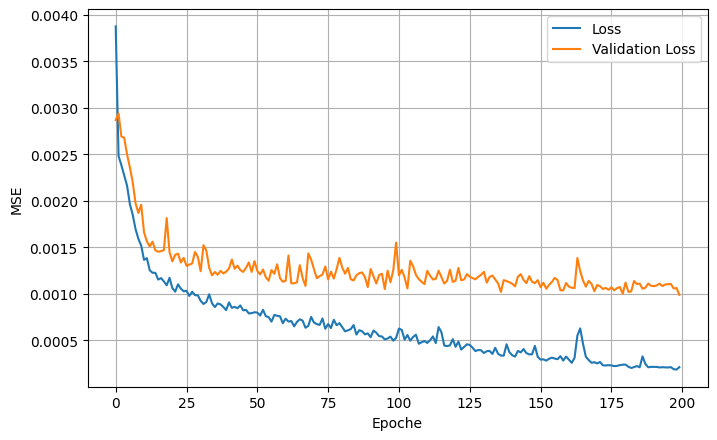

In [9]:
dnn_model_LSTM_12189500 = model.model_LSTM(forcing_LSTM_12189500.shape[1],forcing_LSTM_12189500.shape[2])

# Bauen und Trainieren des NNs
history = model.kompilierung(model=dnn_model_LSTM_12189500, inputs=forcing_LSTM_12189500_train, targets=streamflow_LSTM_12189500_train,
                          validation=(forcing_LSTM_12189500_eval, streamflow_LSTM_12189500_eval), batch_size=64, epochs=200)

model.loss(history)


# Evaluierung und Speichern der Metriken
result_12189500_LSTM = dnn_model_LSTM_12189500.evaluate(forcing_LSTM_12189500_test, streamflow_LSTM_12189500_test)
# Vorhersage der auf den Testdaten
y_predicted_12189500_LSTM = dnn_model_LSTM_12189500.predict(forcing_LSTM_12189500_test)


## Comparison of Nash–Sutcliffe model efficiency coefficient

Text(0.5, 1.0, 'Comparing of NSE value between LSTM and CNN-LSTM Models')

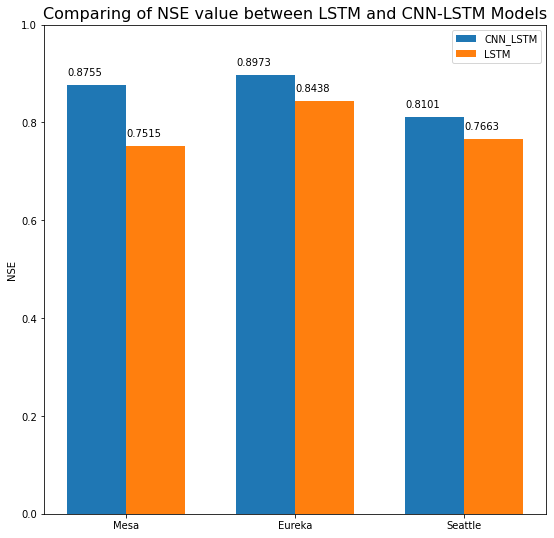

In [10]:
# NSE Berechnung
index=["Mesa","Eureka","Seattle"]

# CNNLSTM NSE
y_predicted_9494000_shaped=np.reshape(y_predicted_9494000,(y_predicted_9494000.shape[0],y_predicted_9494000.shape[1])) #Mesa
nse_9494000 = postProcess.nse(y_predicted_9494000_shaped, streamflow_9494000_test)#Mesa

y_predicted_11522500_shaped=np.reshape(y_predicted_11522500,(y_predicted_11522500.shape[0],y_predicted_11522500.shape[1]))#Eureka
nse_11522500 = postProcess.nse(y_predicted_11522500_shaped, streamflow_11522500_test)#Eureka

y_predicted_12189500_shaped=np.reshape(y_predicted_12189500,(y_predicted_12189500.shape[0],y_predicted_12189500.shape[1]))#Seattle
nse_12189500 = postProcess.nse(y_predicted_12189500_shaped, streamflow_12189500_test)#Seattle

# LSTM NSE
nse_9494000_LSTM = postProcess.nse(y_predicted_9494000_LSTM, streamflow_LSTM_9494000_test)#Mesa
nse_11522500_LSTM= postProcess.nse(y_predicted_11522500_LSTM, streamflow_LSTM_11522500_test)#Eureka
nse_12189500_LSTM = postProcess.nse(y_predicted_12189500_LSTM, streamflow_LSTM_12189500_test)#Seattle

nse_CNNLSTM = [nse_9494000,nse_11522500,nse_12189500]
nse_LSTM=[nse_9494000_LSTM,nse_11522500_LSTM,nse_12189500_LSTM]
x = np.arange(len(index)) 
width = 0.35 
fig, ax = plt.subplots(figsize=(9,9))
ax.bar(x , nse_CNNLSTM, width, label='CNN_LSTM')
ax.bar(x+width , nse_LSTM, width, label='LSTM')
ax.set_xticks(x+width/2)
ax.set_xticklabels(index)
plt.ylim(0,1)
for ind, value in enumerate(nse_CNNLSTM):
    plt.text(ind-width/2, value+0.02, str(round(value,4)))
for ind, value in enumerate(nse_LSTM):
    plt.text(ind+width/2, value+0.02, str(round(value,4)))
ax.legend()
plt.ylabel('NSE')
plt.title('Comparing of NSE value between LSTM and CNN-LSTM Models',fontsize=16)

## Comparison of real and predicted Streamflow

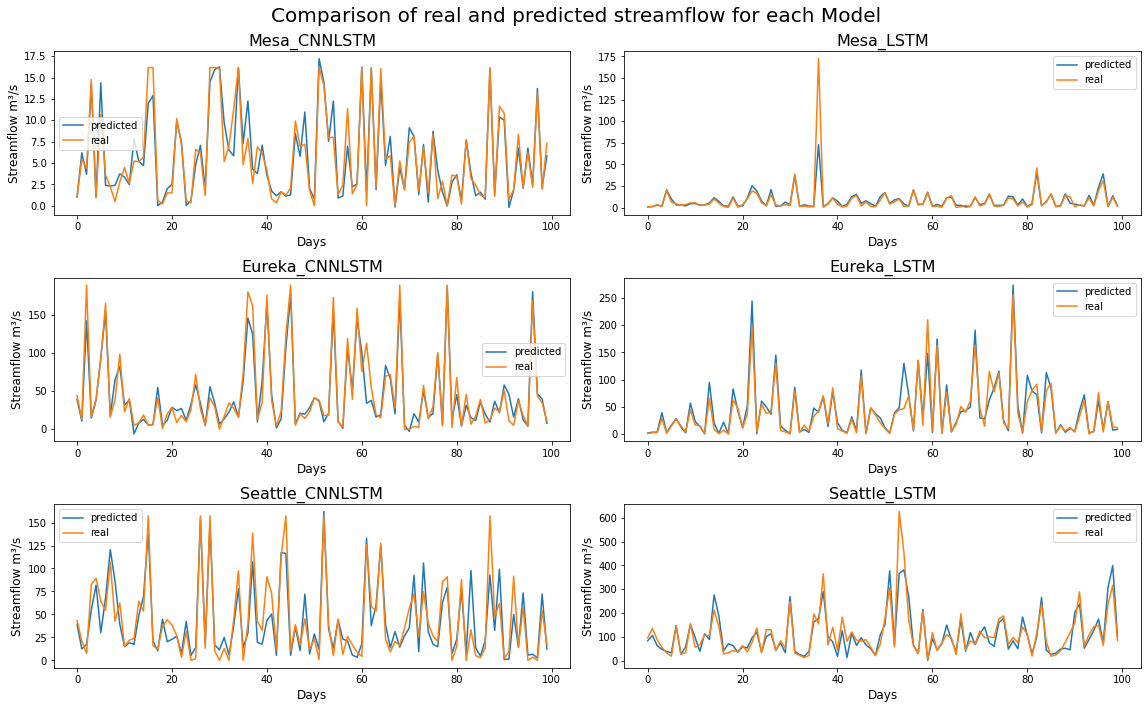

In [11]:
#CNNLSTM rescale Streamflow
y_9494000_simulated_real=y_predicted_9494000*SF_streamflow_9494000[0]
streamflow_9494000_test_real=streamflow_9494000_test*SF_streamflow_9494000[0]
y_11522500_simulated_real=y_predicted_11522500*SF_streamflow_11522500[0]
streamflow_11522500_test_real=streamflow_11522500_test*SF_streamflow_11522500[0]
y_12189500_simulated_real=y_predicted_12189500*SF_streamflow_12189500[0]
streamflow_12189500_test_real=streamflow_12189500_test*SF_streamflow_12189500[0]

#LSTM rescale Streamflow
y_9494000_LSTM_simulated=y_predicted_9494000_LSTM*SF_LSTM_streamflow_9494000
y_11522500_LSTM_simulated=y_predicted_11522500_LSTM*SF_LSTM_streamflow_11522500
y_12189500_LSTM_simulated=y_predicted_12189500_LSTM*SF_LSTM_streamflow_12189500
y_9494000_LSTM_real=streamflow_LSTM_9494000_test*SF_LSTM_streamflow_9494000
y_11522500_LSTM_real=streamflow_LSTM_11522500_test*SF_LSTM_streamflow_11522500
y_12189500_LSTM_real=streamflow_LSTM_12189500_test*SF_LSTM_streamflow_12189500


def xvalue(length):
    x =[]
    for i in range(length):
        x.append(i)
    return x
x_val = xvalue(y_9494000_simulated_real.shape[0])
x_50_val = xvalue(len(y_9494000_LSTM_simulated))

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(16,10))

# CNNLSTM Plot
ax1.plot(x_val[:100], y_9494000_simulated_real[:100], label="predicted") # Mesa
ax1.plot(x_val[:100], streamflow_9494000_test_real[:100], label="real")# Mesa
ax3.plot(x_val[:100], y_11522500_simulated_real[:100], label="predicted") #Eureka
ax3.plot(x_val[:100], streamflow_11522500_test_real[:100], label="real")#Eureka
ax5.plot(x_val[:100], y_12189500_simulated_real[:100], label="predicted")# Seattle
ax5.plot(x_val[:100], streamflow_12189500_test_real[:100], label="real")# Seattle
# CNNLSTM Title + Legend
ax1.legend(),ax1.set_title("Mesa_CNNLSTM", fontsize=16)
ax3.legend(),ax3.set_title("Eureka_CNNLSTM", fontsize=16)
ax5.legend(),ax5.set_title("Seattle_CNNLSTM", fontsize=16)

ax2.plot(x_50_val[:100], y_9494000_LSTM_simulated[:100], label="predicted")# Mesa
ax2.plot(x_50_val[:100], y_9494000_LSTM_real[:100], label="real")# Mesa
ax4.plot(x_50_val[:100], y_11522500_LSTM_simulated[:100], label="predicted")#Eureka
ax4.plot(x_50_val[:100], y_11522500_LSTM_real[:100], label="real")#Eureka
ax6.plot(x_50_val[:100], y_12189500_LSTM_simulated[:100], label="predicted") # Seattle
ax6.plot(x_50_val[:100], y_12189500_LSTM_real[:100], label="real")# Seattle
# LSTM Title + Legend
ax2.legend(),ax2.set_title("Mesa_LSTM", fontsize=16)
ax4.legend(),ax4.set_title("Eureka_LSTM", fontsize=16)
ax6.legend(),ax6.set_title("Seattle_LSTM", fontsize=16)

# Axes label
plt.suptitle('Comparison of real and predicted streamflow for each Model',fontsize=20)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
for ax in axes:
    ax.set_xlabel('Days', fontsize=12)
    ax.set_ylabel('Streamflow m³/s', fontsize=12)
plt.tight_layout()
